In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [4]:
df = pd.read_csv("./Downloads/Mall_Customers.csv")

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

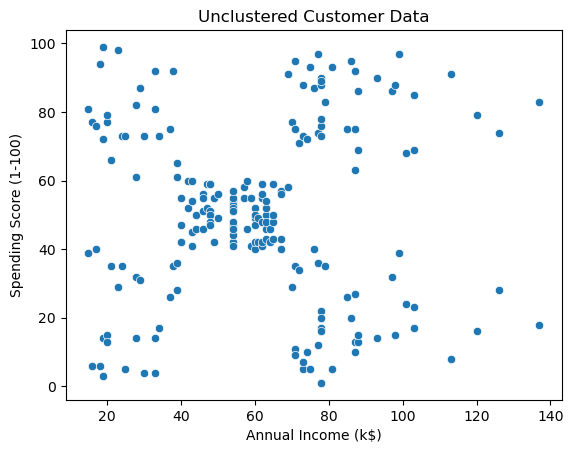

In [7]:
plt.title('Unclustered Customer Data')
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'])
plt.show()

In [8]:
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

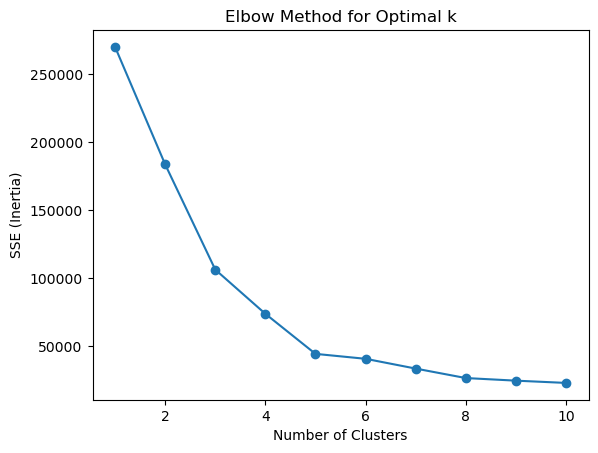

In [9]:
plt.plot(range(1, 11), sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.show()


In [10]:
silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    silhouette.append(silhouette_score(X, labels))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

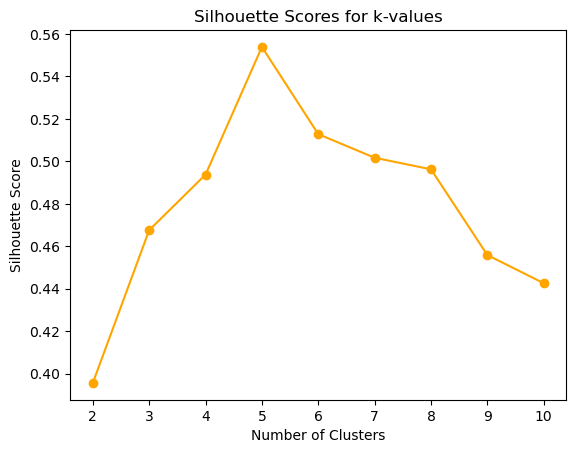

In [11]:
plt.plot(range(2, 11), silhouette, marker='o', color='orange')
plt.title("Silhouette Scores for k-values")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


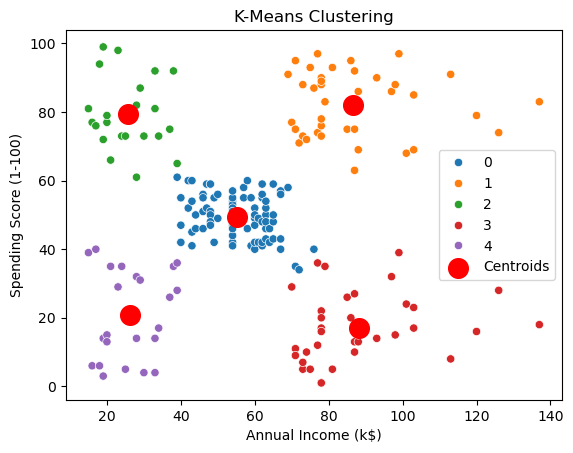

In [13]:
plt.title("K-Means Clustering")
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=labels_kmeans, palette='tab10')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids')
plt.legend()
plt.show()

In [14]:
agglo = AgglomerativeClustering(n_clusters=5)
labels_agglo = agglo.fit_predict(X)

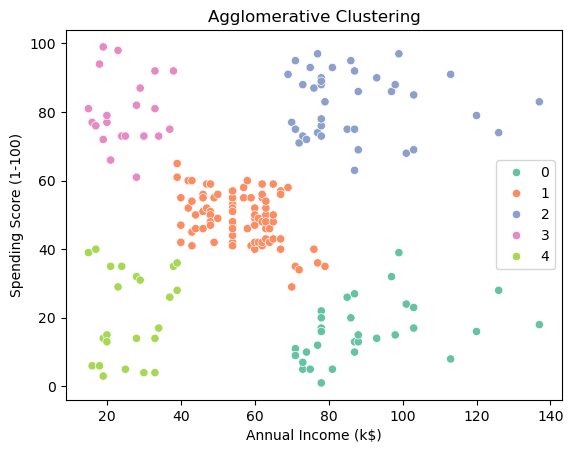

In [15]:
plt.title("Agglomerative Clustering")
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=labels_agglo, palette='Set2')
plt.show()

<Axes: title={'center': 'K-Means Clusters'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

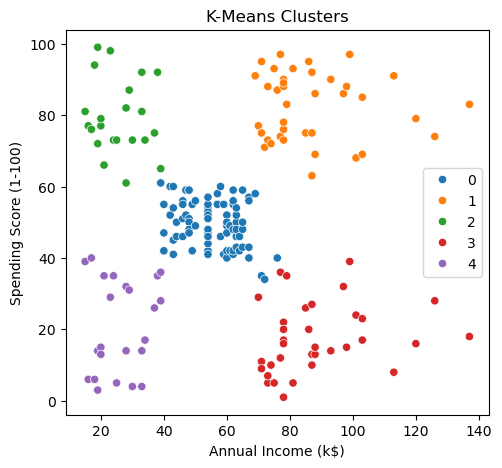

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('K-Means Clusters')
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=labels_kmeans, palette='tab10')

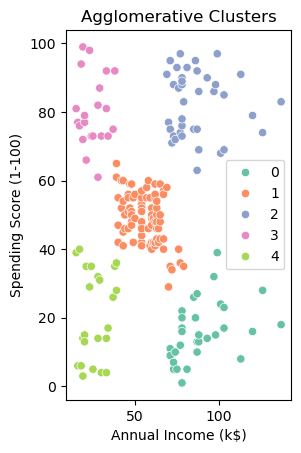

In [17]:
plt.subplot(1,2,2)
plt.title('Agglomerative Clusters')
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=labels_agglo, palette='Set2')
plt.show()

In [18]:
score_kmeans = silhouette_score(X, labels_kmeans)
score_agglo = silhouette_score(X, labels_agglo)

In [19]:
print(f"K-Means Silhouette Score: {score_kmeans:.3f}")
print(f"Agglomerative Silhouette Score: {score_agglo:.3f}")

K-Means Silhouette Score: 0.554
Agglomerative Silhouette Score: 0.553
